In [75]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('student_scores.csv')


In [76]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
df.shape

(25, 2)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [56]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: xlabel='Hours', ylabel='Scores'>

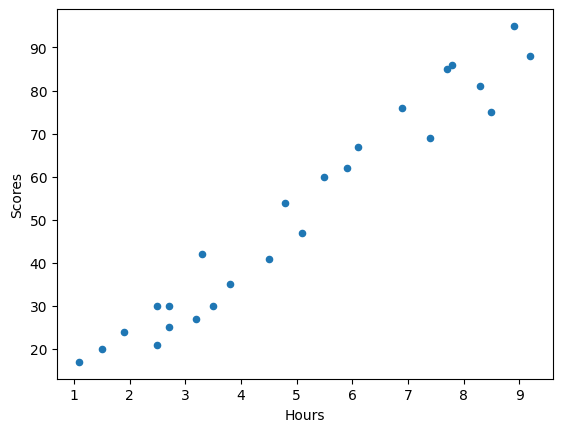

In [57]:
# Check relationship between hours and score

df.plot.scatter(x='Hours',y='Scores')

#We can see positiive Corr between them

In [58]:
# Check how correlated they are using correlation between the numerical variable

df.corr()

#Since the correlation is >0.8 between them it is considered as strong positive correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [59]:
# Separate the target and feature

X= df['Hours'].values.reshape(-1,1)
y= df['Scores'].values.reshape(-1,1)



In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
# Train the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [62]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
regressor.intercept_

array([2.82689235])

In [64]:
regressor.coef_

array([[9.68207815]])

In [65]:
y_pred = regressor.predict(X_test)

In [66]:
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [67]:
df_pred=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})

In [68]:
df_pred

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


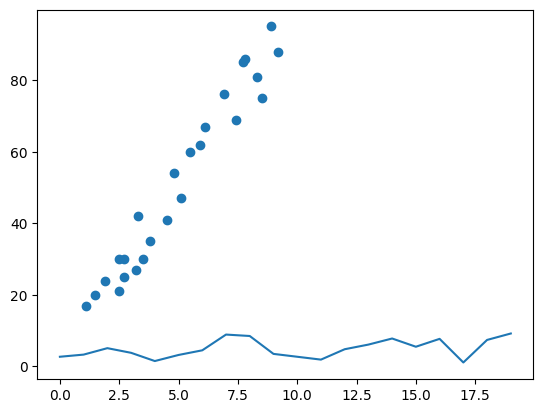

In [69]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(X_train,)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [71]:
print(f'Mean absolute error     is {mae}')
print(f'Mean squared error      is {mse}')
print(f'Root mean squared error is {rmse}')

Mean absolute error     is 3.9207511902099244
Mean squared error      is 18.943211722315272
Root mean squared error is 4.352380006653288


In [72]:
# Finding R2 score
from sklearn.metrics import  r2_score
r2 = r2_score(y_test,y_pred)
print(f'R2 score is {r2}')


R2 score is 0.9678055545167994


In [73]:
X_test.shape

(5, 1)

In [74]:
#Finding Adjusted R2
adj_r2 = 1-((1-r2)*(5-1)/(5-1-1))
print(f'Adjusted R2 score is {adj_r2}')

Adjusted R2 score is 0.9570740726890659
